# ICT 782 - Day 6 Notes

# Interactive Visualizations in Jupyter

Today we'll introduce some tools for making interactive plots in your Jupyter notebooks. You might notice that today's notes looks different. That's because we're viewing these notes as a Jupyter slideshow.

Any Jupyter notebook can be made into a slideshow using *RISE*, a Python-to-Javascript conversion tool. Install *RISE* with the following:

In [ ]:
!conda install -c conda-forge rise

Alternatively, you can install *RISE* with Anaconda Navigator. You may need to shutdown and restart the kernel. You'll see a small icon in the toolbar when *RISE* is successfully installed.

# 3D Plots with Matplotlib

Last time we looked at a variety of 2D plots with Matplotlib. 3D plots are also available, and luckily for us they have almost the same structure as 2D plots.

A 3D plot is constructued by specifying a `figure` object and an `Axes3D` object.

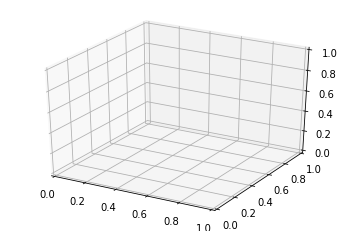

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## *Example:* Plotting a function in 3D

Now that we can create an `Axes3D` object, let's plot something: a Gaussian function of the form
$$
    f(x,y) = \frac{1}{\sqrt{2\pi}}e^{-(x^2+y^2)}.
$$

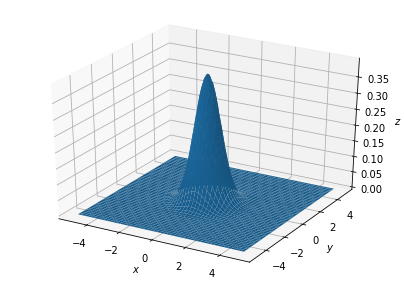

In [2]:
import numpy as np
import pandas as pd

xx, yy = np.meshgrid(np.linspace(-5,5,200), np.linspace(-5,5,200))
z = (lambda x, y: np.exp(-(x**2 + y**2))/np.sqrt(2*np.pi))(xx, yy)

fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, z)
ax.set(xlabel = r'$x$', ylabel = r'$y$', zlabel = r'$z$');

## *Example:* Plotting a 3D scatterplot

Recall the WHO depression data from last day. We can now plot all three variables (depression prevalence, psychiatrists, and psychologists) on one `Axes3D` object using the `scatter3D()` method. The data is saved in the `depression_who.csv` file.

In the `scatter3D` method, we pass in the 3D coordinates for each data point, then specify which way is 'up' with the `c = <z>` argument.

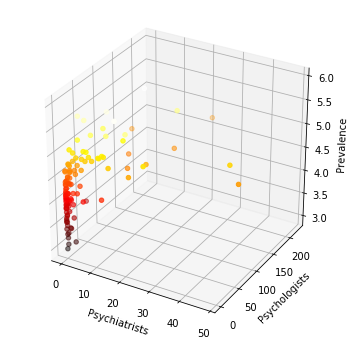

In [3]:
data = pd.read_csv('depression_WHO.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(data['x1'], data['x2'], data['y'], c = data['y'], cmap = 'hot')
ax.set(xlabel = 'Psychiatrists', ylabel = 'Psychologists', zlabel = 'Prevalence');

## Other types of 3D plots

We have seen the `plot_surface()` method, which plots the surface defined by a function of two variables. For this method, the mesh that actually plots the surface is made up of small colored rectangles. We can also plot the contour lines (similar to a topographical map) of the function using `plot_contour3D()`.

A similar method for plotting is the `plot_wireframe()` method. Let's plot all three to compare the result.

**Note:** To place 3D plots side-by-side, we add each `Axes3D` individually. The numerical argument in `fig.add_subplot(<>)` refers to the grid of axes and the position of the current axis in the grid. Thus, `fig.add_subplot(132)` means that we are placing an `Axes3D` object in a grid of 1 row, 3 columns, in the 2nd position.

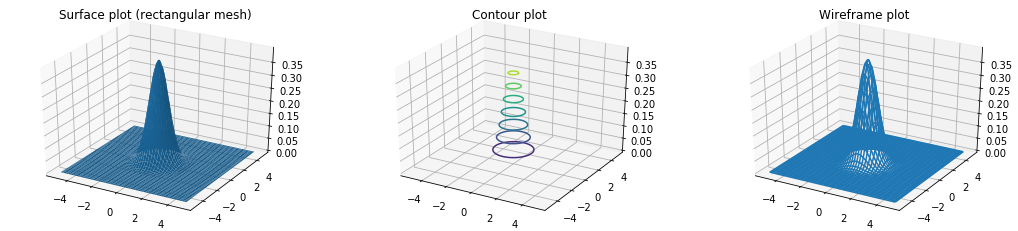

In [4]:
fig = plt.figure(figsize = (18,4))

ax1 = fig.add_subplot(131, projection = '3d')
ax1.plot_surface(xx, yy, z)
ax1.set(title = 'Surface plot (rectangular mesh)');

ax2 = fig.add_subplot(132, projection = '3d')
ax2.contour3D(xx, yy, z)
ax2.set(title = 'Contour plot');

ax3 = fig.add_subplot(133, projection = '3d')
ax3.plot_wireframe(xx, yy, z)
ax3.set(title = 'Wireframe plot');

The difference between the surface plot and the wireframe plot is that the surface plot is made up of colored rectangular patches, whereas the wireframe plot is just a colored mesh.

## Changing the viewing angle

To look at the plot from a different perspective, we change the xy angle (the elevation) and the rotation about the z-axis (the azimuth). These angles are specified in the `ax.view_init(<elevation>, <azimuth>)` method.

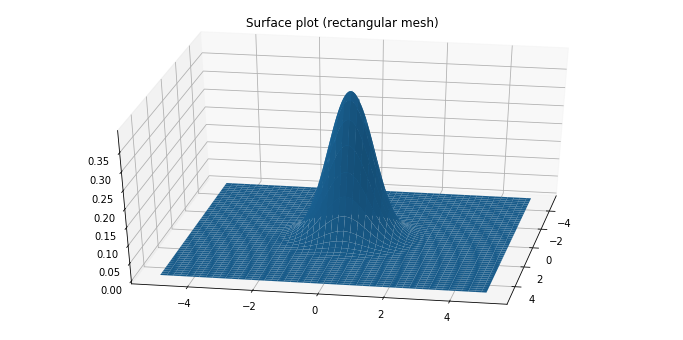

In [9]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(111, projection = '3d')

ax1.plot_surface(xx, yy, z)
ax1.set(title = 'Surface plot (rectangular mesh)')
ax1.view_init(35, 10);

## *Example:* Random walk in 3D

For this example, we'll randomly move a point through 3-dimensional space. We'll start at (0,0,0), and we'll track our movements by iterating a certain number of steps, and then we'll plot the resulting path. At each iteration, we'll move our point in a random direction. To make things simple, we'll allow our point to move by 1 unit at a time.

This script is simplifed from [Nilesh's script](https://towardsdatascience.com/random-walks-with-python-8420981bc4bc).

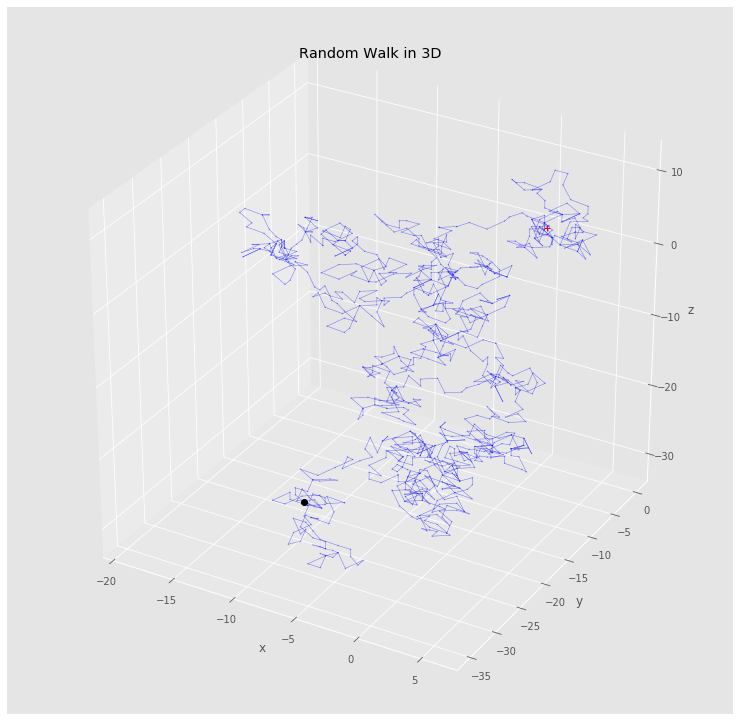

In [111]:
# Define parameters for the walk
dims = 3
step_n = 1000
step_set = [-1, 0, 1]
origin = np.zeros((1,dims))

# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

# Plot the random walk
fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(111, projection='3d')

ax.set(xlabel = 'x', ylabel = 'y', zlabel = 'z')

# Plot the points along the path
ax.scatter3D(path[:,0], path[:,1], path[:,2], 
             c='blue', alpha=0.25, s=1)

# Connect the points along the path
ax.plot3D(path[:,0], path[:,1], path[:,2], 
          c='blue', alpha=0.5, lw=0.5)

# Show the start point
ax.plot3D(start[:,0], start[:,1], start[:,2], 
          c='red', marker='+')

# Show the stop point
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], 
          c='black', marker='o')
plt.title('Random Walk in 3D');

# Jupyter widgets

3D plots have added more impressive visuals to our repertoire, and now we're going to get a lot more interactive. Up to this point, the only interactivity has been the potential for sharing live plots in a Jupyter slideshow. Now we will introduce the key to interactivity in Jupyter notebooks: Jupyter widgets.

Widgets are a way of connecting Python (the language for computing in these notes) and JavaScript (the way of displaying these notes). We can connect the output of a widget with a specified Python function. Some common widgets are sliders, dropdown menus, select boxes, and text boxes.

Here are a few examples of widgets.

In [14]:
import ipywidgets as widgets
from ipywidgets import interact

widgets.IntSlider(min = 0, max = 100, step = 1)

IntSlider(value=0)

In [15]:
widgets.FloatSlider(min = 0, max = 10, step = 0.25, orientation = 'vertical')

FloatSlider(value=0.0, max=10.0, orientation='vertical', step=0.25)

In [16]:
widgets.Dropdown(
    options=['','Good', 'Better', 'Best'],
    value = '',
    description='Select one:',
    disabled=False,
)

Dropdown(description='Select one:', options=('', 'Good', 'Better', 'Best'), value='')

In [20]:
widgets.Button(
    description='Paws game',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Take a break',
    icon='paw' # (FontAwesome names without the `fa-` prefix)
)

Button(button_style='success', description='Paws game', icon='paw', style=ButtonStyle(), tooltip='Take a break…

A list of font-awesome icon names for use in your `Button` objects is available [here](https://fontawesome.com/v4.7.0/icons/).

# Linking widgets to plots

There are many more widgets available. The full widget list is found at the [official documentation](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).

Let's link some of these widgets to our plotting functions. Returning to the world of 2D plots, we'll make a function to display 3 plots and a dropdown widget to select which plot to display. We'll then bind the function to the output of the dropdown widget using the `interact()` function.

Once we've declared a function and a widget, the general syntax for binding them together is:
```
interact(<function>, x = <widget>)
```

In [21]:
anna = pd.DataFrame(3*np.random.rand(30).reshape(10,3), 
                       columns = [['Anna','Anna','Anna'],['Hgb','Lap','Avx']])
beth = pd.DataFrame(3*np.random.rand(30).reshape(10,3), 
                       columns = [['Beth','Beth','Beth'],['Hgb','Lap','Avx']])
chase = pd.DataFrame(3*np.random.rand(30).reshape(10,3), 
                       columns = [['Chase','Chase','Chase'],['Hgb','Lap','Avx']])
results = anna.join(beth, how = 'outer')
results = results.join(chase, how = 'outer')
results

Anna                          Beth                         Chase  \
        Hgb       Lap       Avx       Hgb       Lap       Avx       Hgb   
0  1.541963  0.978055  2.285286  0.577902  0.793454  2.622556  0.775852   
1  1.872250  0.364638  1.306196  2.426146  0.197988  1.405363  1.447098   
2  2.983587  0.051819  1.524137  1.023891  1.246185  2.279369  2.427963   
3  2.179387  0.691432  1.359955  1.584311  2.195203  0.269077  0.277885   
4  1.428999  2.107798  0.482933  2.095137  0.962153  2.097437  2.778512   
5  1.851609  0.771334  2.462304  2.660498  0.039529  2.954869  1.101932   
6  1.997282  0.974971  0.386545  0.694237  2.671985  1.744017  2.506791   
7  2.089897  0.508925  0.017880  2.028777  2.297694  2.576047  0.197996   
8  2.628542  2.203476  1.980909  0.249802  2.743903  1.319719  1.051309   
9  1.395604  0.566990  0.566042  1.535454  1.588127  0.645383  2.334922   

                       
        Lap       Avx  
0  0.913797  2.839833  
1  0.951815  1.731058  
2  1.474010  2.463220  
3  2.877403  2.705915  
4  0.798005  2.560597  
5  2.928173  1.018465  
6  1.316105  2.176468  
7  0.375510  2.658663  
8  2.848313  2.732319  
9  0.038883  0.911084

In [22]:
def plot_results(Result = ['Hgb','Lap','Avx']):
    
    ax = results.xs(Result, axis = 1, level = 1).plot();
    ax.set(title = Result, xlabel = 'Trial', ylabel = Result);
    
w = widgets.Dropdown(options = ['Hgb','Lap','Avx'])
    
interact(plot_results, x = w);

interactive(children=(Dropdown(description='Result', options=('Hgb', 'Lap', 'Avx'), value='Hgb'), Output()), _…

## Shortcuts for widgets

In the example above, it wasn't completely necessary to specify the `x` argument in the `interact()` function. Instead, we could have passed `x = ['Hgb','Lap','Avx']` to the `interact()` function and it would have inferred the widget type.

This works in general in the following table.

|`x` argument|Assumed widget type for the `interact()` function|
|---|---|
|`1`, `<int>`, `(<min>, <max>)`, or `(<min>,<max>,<step>)` (integers)|`IntSlider`|
|`1.0`, `<float>`, `(<min>, <max>)`, or `(<min>,<max>,<step>)` (floats)|`FloatSlider`|
|`<list>` or `<list of tuples>`|`Dropdown`|
|`<string>`|`Text`|
|`<bool>`|`Checkbox`|

When using these shortcuts, we can take the convenience one step further. Rather than declaring `interact(<func>, x = <shortcut>)`, we can use the `@interact` function decorator instead. This tells the function that it will be passed to `interact`, and the shortcuts specified as its arguments will be given by the corresponding widget. This sounds confusing, so let's see an example.

We'll plot the same `results` as we did above, but we'll use the widget shortcut for dropdown widgets and the `@interact` function decorator.

In [23]:
@interact
def plot_results(Result = ['Hgb','Lap','Avx']):
    
    ax = results.xs(Result, axis = 1, level = 1).plot();
    ax.set(title = Result, xlabel = 'Trial', ylabel = Result);

interactive(children=(Dropdown(description='Result', options=('Hgb', 'Lap', 'Avx'), value='Hgb'), Output()), _…

## *Example:* Plotting a 2D function with widgets

For this example, we'll take a simple function and control its display with a `FloatSlider`. Let's use the function $y = sin(kx)$ and create a `FloatSlider` to control the value of $k$.

In [24]:
@interact
def plot_sin(k = 1.0):
    
    x = np.linspace(-2*np.pi, 2*np.pi, 101)
    
    fig, ax = plt.subplots()
    ax.plot(x, np.sin(k*x))
    ax.set(title = r'Various period values for $sin(kx)$');

interactive(children=(FloatSlider(value=1.0, description='k', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

## *Example:* Overlaid data plots with widgets

For this example, we'll plot a scatterplot of a dataset and two fitted regression lines. We'll re-use the dataset from the Day 5 example - Linear regression with synthetic data.

We will begin with the scatterplot of the data. Our selector will allow us to overlay the line of best fit for the linear model
$$
    y = \beta_0 + \beta_1x,
$$
or the quadratic model
$$
    y = \alpha_0 + \alpha_1x + \alpha_2x^2.
$$

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

x = 5*np.random.rand(200)
y = x + 10.23*np.random.randn(200) + 5.1*x**2

example_data = pd.DataFrame({'x': x, 'y': y})
example_data['x2'] = x**2

# Fitting the models

model1 = ols('y ~ x', data = example_data).fit()
model2 = ols('y ~ x + x2', data = example_data).fit()

In [26]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1499.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):           2.52e-94
Time:                        10:18:01   Log-Likelihood:                -812.27
No. Observations:                 200   AIC:                             1629.
Df Residuals:                     198   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.1626      1.979    -10.694      0.0

In [27]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1439.
Date:                Sat, 14 Mar 2020   Prob (F-statistic):          2.75e-118
Time:                        10:18:15   Log-Likelihood:                -752.31
No. Observations:                 200   AIC:                             1511.
Df Residuals:                     197   BIC:                             1521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0965      2.226      0.043      0.9

In [28]:
# Plotting the line of best fit over the scatterplot
@interact
def plot_results(model = ['Linear','Quadratic']):
    fig, ax = plt.subplots(figsize = (12,5))

    if model == 'Linear':
        fit = model1
    else:
        fit = model2
    # Plotting the line of best fit
    sm.graphics.plot_fit(fit, 1, ax=ax)
    ax.set(title = 'Line of best fit for {} model'.format(model), 
           xlabel = r'$x$', 
           ylabel = r'$y$',
           ylim = [-50,150]);

interactive(children=(Dropdown(description='model', options=('Linear', 'Quadratic'), value='Linear'), Output()…

# *Exercises*

1. Using the `tomato.csv` data, make an interactive plot where the treatment group is selected using an `IntSlider` widget.

In [30]:
tomato = pd.read_csv('tomato.csv')
tomato.drop('Unnamed: 0', axis = 1, inplace = True)
tomato

,Control,Brand A,Brand B
0,6.010831,10.908820,9.969491
1,5.023822,11.076495,8.133059
2,6.997431,9.853311,9.775496
3,7.987032,9.186250,9.216780
4,7.000895,9.955839,8.043651
5,4.976122,10.665724,9.924802
6,6.003509,12.878014,8.070867
7,6.007099,12.067047,8.967957
8,4.992056,12.958871,11.949968
9,5.010229,12.747096,11.580474


In [35]:
@interact
def plot_tomato(frame = (0,2,1)):
    """ Select which treatment group to plot from the tomato dataset. """
    
    fig, ax = plt.subplots()
    
    if frame == 0:
        data = tomato['Control']
        color = 'r'
    elif frame == 1:
        data = tomato['Brand A']
        color = 'g'
    elif frame == 2:
        data = tomato['Brand B']
        color = 'b'
        
    ax.scatter(data.index, data, marker = '+', color = color);
    ax.set(ylim = [0,15], 
           title = 'Scatterplot of {}'.format(data.name));

interactive(children=(IntSlider(value=1, description='frame', max=2), Output()), _dom_classes=('widget-interac…

2. Using the `govt.csv` data, make an interactive display that allows the user to select both a year and a state for plotting.

In [50]:
govt = pd.read_csv('govt.csv')
govt.index = govt['Year']
govt.drop('Year', axis = 1, inplace = True)

@interact
def display_state_info(Year = govt.index, State = govt.columns):
    print('Amount for {} in {}: {}'.format(Year, State, govt[State].loc[Year]))

interactive(children=(Dropdown(description='Year', options=(1942, 1952, 1957, 1962, 1967, 1972, 1977, 1982, 19…

3. Create an appropriate plot for the `facebook.xlsx` dataset. Allow the user to specify which of the two workbooks they would like to display.

In [77]:
plt.style.use('ggplot')
facebook = pd.ExcelFile('facebook.xlsx')

f1 = facebook.parse('2013-2016')
f2 = facebook.parse('2016-2020')
f2['Gain'] = f2['Close'] - f2['Open']

@interact
def plot_facebook(Years = ['2013-2016','2016-2020'], Option = ['Open/Close', 'Gain']):
    """ Plotting Facebook stock data with options for year or open/close/gain """
    
    if Years == '2013-2016':
        data = f1
    elif Years == '2016-2020':
        data = f2
        
    fig, ax = plt.subplots() 
    
    
    if Option == 'Gain':
        ax.plot(data['Date'], data['Gain']);
        ax.set_title('Plot of Facebook stock gains: {}'.format(Years));
        plt.xticks(rotation=90);
        
    else:
        ax.plot(data['Date'], data['Open'], 'r-', data['Date'], data['Close'], 'b-');
        ax.set(ylim = [0,250]);
        plt.xticks(rotation=90);
        ax.set_title('Plot of Facebook stock open/close values: {}'.format(Years))

interactive(children=(Dropdown(description='Years', options=('2013-2016', '2016-2020'), value='2013-2016'), Dr…

4. Create an appropriate plot for the `nursing.json` dataset from Day 3.

In [113]:
nursing = pd.read_json('nursing.json')
nursing

,Summary statistics,2016,2017,2018
0,Operating revenue,"15,676.2","16,341.2","16,833.4"
1,Operating expenses,"15,779.8","16,391.7","16,887.9"
2,"Salaries, wages, commissions and benefits","11,806.4","12,120.9","12,508.1"
3,Operating surplus or deficit,-103.6,-50.5,-54.5


In [114]:
nursing = nursing.T
# nursing.columns = ['']

5. Adapt the above code for the random walk to perform and plot a random walk in 2D.